In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [11]:
import keras

In [51]:
import tensorflow as tf

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_2017 = pd.read_excel("Data\\1.ОСНОВНОЙ Факт объемы_м3_2017_2022_по дням1.xlsx", sheet_name="2017")
data_2018 = pd.read_excel("Data\\1.ОСНОВНОЙ Факт объемы_м3_2017_2022_по дням1.xlsx", sheet_name="2018")
data_2019 = pd.read_excel("Data\\1.ОСНОВНОЙ Факт объемы_м3_2017_2022_по дням1.xlsx", sheet_name="2019")
data_2020 = pd.read_excel("Data\\1.ОСНОВНОЙ Факт объемы_м3_2017_2022_по дням1.xlsx", sheet_name="2020")
data_2021 = pd.read_excel("Data\\1.ОСНОВНОЙ Факт объемы_м3_2017_2022_по дням1.xlsx", sheet_name="2021")
data_2017 = data_2017.iloc[1:]
data_2018 = data_2018.iloc[1:]
data_2019 = data_2019.iloc[1:]
data_2020 = data_2020.iloc[1:]
data_2021 = data_2021.iloc[1:]

In [5]:
x_1 = data_2017['в кубах ,м3']
x_2 = data_2018['Unnamed: 0']
x_3 = data_2019['Unnamed: 0']
x_4 = data_2020[:366]['Unnamed: 0']
x = pd.concat([x_1,x_2,x_3,x_4])

In [7]:
y_1 = data_2017['Unnamed: 1']
y_2 = data_2018['хранение факт']
y_3 = data_2019['хранение факт']
y_4 = data_2020[:366]['хранение факт']
y = pd.concat([y_1,y_2,y_3,y_4])

In [24]:
data = y
data.index = x

In [25]:
data

2017-01-01     4727.21
2017-01-02     4727.21
2017-01-03     4727.21
2017-01-04     4727.21
2017-01-05     4727.21
                ...   
2020-12-27    10366.74
2020-12-28    10503.06
2020-12-29    10543.22
2020-12-30    10448.22
2020-12-31    10421.97
Length: 1461, dtype: object

array([<AxesSubplot:>], dtype=object)

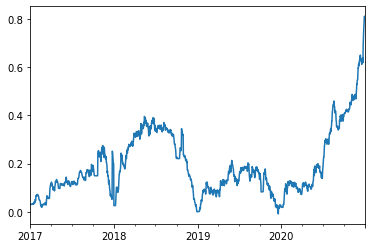

In [31]:
data.plot(subplots=True)

In [27]:
t_s = 1000

In [28]:
train_max = data[:t_s].max()
train_min = data[:t_s].min()

In [29]:
data = (data-train_min)/train_max

In [34]:
data = data.values

In [32]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [46]:
x_train, y_train = univariate_data(data, 0, t_s, 30, 7)
x_val, y_val = univariate_data(data, t_s, None, 30, 7)

In [47]:
print ('Single window of past history')
print (x_train[0])
print ('\n Target temperature to predict')
print (y_train[0])

Single window of past history
[[0.030749575682524195]
 [0.030749575682524195]
 [0.030749575682524195]
 [0.030749575682524195]
 [0.030749575682524195]
 [0.030749575682524195]
 [0.030749575682524195]
 [0.030749575682524195]
 [0.030749575682524195]
 [0.0333698905769528]
 [0.03379161219502079]
 [0.032928023021716]
 [0.03451283674566565]
 [0.03451283674566565]
 [0.03451283674566565]
 [0.0316561428551225]
 [0.037639486194271314]
 [0.03776036181728437]
 [0.04171836693972482]
 [0.03809881356172113]
 [0.03809881356172113]
 [0.03809881356172113]
 [0.05148108809175004]
 [0.04722895228664454]
 [0.04699794554044168]
 [0.06714119658433693]
 [0.06443089650388757]
 [0.06443089650388757]
 [0.06443089650388757]
 [0.07079701264924448]]

 Target temperature to predict
0.06267148465780774


In [48]:
x_train.shape

(970, 30, 1)

In [57]:
model = Sequential()
model.add(LSTM(8, return_sequences=True, input_shape=x_train.shape[-2:]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

In [56]:
x_train

array([[[0.030749575682524195],
        [0.030749575682524195],
        [0.030749575682524195],
        ...,
        [0.06443089650388757],
        [0.06443089650388757],
        [0.07079701264924448]],

       [[0.030749575682524195],
        [0.030749575682524195],
        [0.030749575682524195],
        ...,
        [0.06443089650388757],
        [0.07079701264924448],
        [0.06817535469233806]],

       [[0.030749575682524195],
        [0.030749575682524195],
        [0.030749575682524195],
        ...,
        [0.07079701264924448],
        [0.06817535469233806],
        [0.06971450429203817]],

       ...,

       [[0.1627739603248734],
        [0.18771328747743316],
        [0.18309046642842078],
        ...,
        [0.16689178988218656],
        [0.1699297972072493],
        [0.164252672113067]],

       [[0.18771328747743316],
        [0.18309046642842078],
        [0.18262039456114756],
        ...,
        [0.1699297972072493],
        [0.164252672113067],
        [0.15

In [59]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
x_val = np.asarray(x_val).astype('float32')
y_val = np.asarray(y_val).astype('float32')

train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val = val.batch(BATCH_SIZE).repeat()

In [60]:
model.fit(train, epochs=10,
          steps_per_epoch=200,
          validation_data=val, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 7s 22ms/step - loss: 0.0881 - val_loss: 0.1560
Epoch 2/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0805 - val_loss: 0.1592
Epoch 3/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0802 - val_loss: 0.1583
Epoch 4/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0800 - val_loss: 0.1582
Epoch 5/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0799 - val_loss: 0.1581
Epoch 6/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0799 - val_loss: 0.1582
Epoch 7/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0799 - val_loss: 0.1583
Epoch 8/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0798 - val_loss: 0.1579
Epoch 9/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0798 - val_loss: 0.1583
Epoch 10/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0798 - val_lo

In [65]:
def create_time_steps(length):
  return list(range(-length, 0))

In [66]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

8/8 [==============================] - 0s 3ms/step


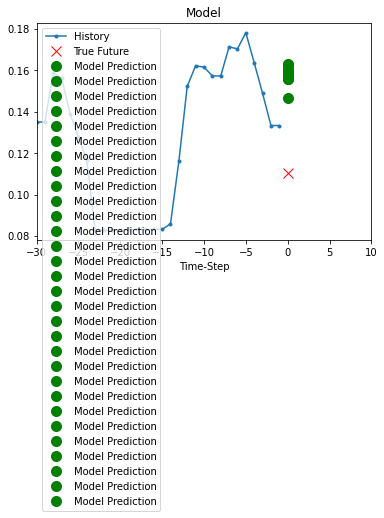

6/6 [==============================] - 0s 3ms/step


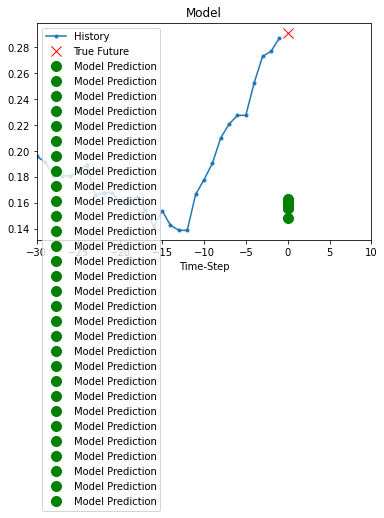

8/8 [==============================] - 0s 2ms/step


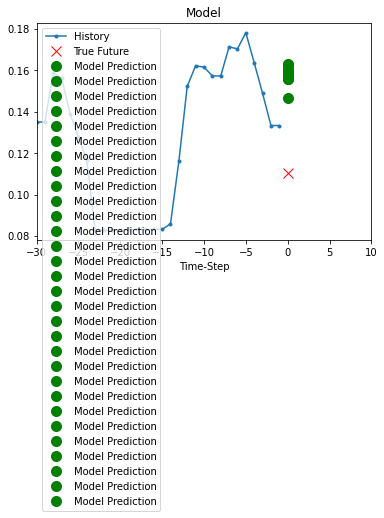

In [82]:
for x, y in val.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),model.predict(x)[0].reshape(1,30)], 0, 'Model')
  plot.show()